In [131]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

In [132]:
achievements = pd.read_csv('data/test.csv')
achievements.head(10)

date  condition  store_id  category_id    price
0  2018.000008          1       116          478  3560000
1  2018.000008          1       116          478  1800000
2  2017.000004          1       116          477  4150000
3  2017.000004          1       116          478  4150000
4  2017.000004          1       116          477  1320000
5  2017.000004          1       116          483  1320000
6  2016.000000          2      8315          477     2500
7  2016.000000          2      8315          483     2500
8  2016.000000          2      8315         5714     2500
9  2016.000000          2      8315          477     1400

In [133]:
achievements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68916 entries, 0 to 68915
Data columns (total 5 columns):
date           68916 non-null float64
condition      68916 non-null int64
store_id       68916 non-null int64
category_id    68916 non-null int64
price          68916 non-null int64
dtypes: float64(1), int64(4)
memory usage: 2.6 MB


In [134]:
# achievements['date'] = pd.to_datetime(achievements['date'])  floatとして扱う
achievements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68916 entries, 0 to 68915
Data columns (total 5 columns):
date           68916 non-null float64
condition      68916 non-null int64
store_id       68916 non-null int64
category_id    68916 non-null int64
price          68916 non-null int64
dtypes: float64(1), int64(4)
memory usage: 2.6 MB


In [135]:
data = np.array(achievements[['date', 'condition', 'store_id', 'category_id']])
target = np.array(achievements['price'])
feature_names = ['date', 'condition', 'store_id', 'category_id']
target_names = ["新品・未開封", "中古美品", "中古品・使用感あり", "目立つ傷がある", "故障品", "不明"]

In [136]:
from sklearn.datasets.base import Bunch
from sklearn.model_selection import  train_test_split

achievement_datasets = Bunch(
    data=data,
    target=target,
    feature_names=feature_names,
    target_names=target_names,
)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    achievement_datasets.data,
    achievement_datasets.target,
    random_state =100
)

In [138]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
print("Accuracy (training): {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy (test): {:.3f}".format(tree.score(X_test, y_test)))

Accuracy (training): 0.565
Accuracy (test): 0.524


In [139]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor().fit(X_train, y_train)
print("Accuracy (training): {:.3f}".format(knr.score(X_train, y_train)))
print("Accuracy (test): {:.3f}".format(knr.score(X_test, y_test)))

Accuracy (training): 0.599
Accuracy (test): 0.463


In [140]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("Accuracy (training): {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy (test): {:.3f}".format(lr.score(X_test, y_test)))

Accuracy (training): 0.117
Accuracy (test): 0.098


In [141]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train, y_train)
print("Accuracy (training): {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy (test): {:.3f}".format(nb.score(X_test, y_test)))

Accuracy (training): 0.038
Accuracy (test): 0.029


Fetaure importances: 
[0.006 0.097 0.686 0.211]


Text(0,0.5,'Feature')

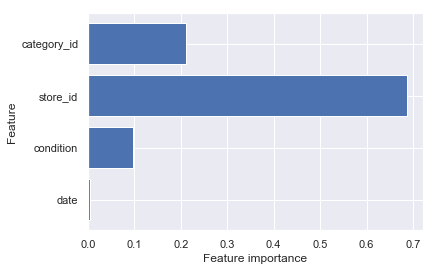

In [142]:
print("Fetaure importances: \n{}".format(tree.feature_importances_))
n_features = achievement_datasets.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), achievement_datasets.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [143]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', 
                feature_names=achievement_datasets.feature_names,
                impurity=False,
                filled=True,
)

In [144]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [145]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,
    max_depth=2, random_state=0, loss='ls').fit(X_train, y_train)
print("Accuracy (training): {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy (test): {:.3f}".format(nb.score(X_test, y_test)))

Accuracy (training): 0.038
Accuracy (test): 0.029


In [146]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor().fit(X_train, y_train)
print("Accuracy (training): {:.3f}".format(knr.score(X_train, y_train)))
print("Accuracy (test): {:.3f}".format(knr.score(X_test, y_test)))

Accuracy (training): 0.599
Accuracy (test): 0.463


In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [148]:
knr = KNeighborsRegressor(n_neighbors=5, weights='distance',p=1).fit(X_train_scaled, y_train)
print("Accuracy (training): {:.3f}".format(knr.score(X_train_scaled, y_train)))
print("Accuracy (test): {:.3f}".format(knr.score(X_test_scaled, y_test)))

Accuracy (training): 0.842
Accuracy (test): 0.390


In [149]:
nb = GaussianNB().fit(X_train_pca, y_train)
print("Accuracy (training): {:.3f}".format(nb.score(X_train_pca, y_train)))
print("Accuracy (test): {:.3f}".format(nb.score(X_test_pca, y_test)))

Accuracy (training): 0.033
Accuracy (test): 0.027


In [160]:
from sklearn.neural_network import MLPRegressor

hidden_layers = [10,10,10]
alpha = 0.01

mlp = MLPRegressor(max_iter = 1000, 
                   hidden_layer_sizes=hidden_layers, alpha=alpha, random_state=0)

mlp.fit(X_train_pca, y_train)
print("Accuracy (training): {:.3f}".format(mlp.score(X_train_pca, y_train)))
print("Accuracy (test): {:.3f}".format(mlp.score(X_test_pca, y_test)))

Accuracy (training): 0.129
Accuracy (test): 0.102
